# Exploring Prosper Loan Dataset
## by Smerling Custodio

## Preliminary Wrangling

> Large dataset from Prosper. It details a number of loan characteristics such as borrower demographics and financials. It also follows through current loan status, ammounts, loan quality, rates and determination criterias.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#loading the data into a dataframe and viewing stats

loan_df = pd.read_csv('prosperLoanData.csv')

In [3]:
#looking at the shape, data types and composition of the dataset

print(loan_df.shape)
loan_df.head()


(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
loan_df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [5]:
loan_df.columns = loan_df.columns.str.replace(' ','')
loan_df.columns = loan_df.columns.str.replace('(','')
loan_df.columns = loan_df.columns.str.replace(')','')
loan_df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRatingnumeric', 'ProsperRatingAlpha',
       'ProsperScore', 'ListingCategorynumeric', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled',
       'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankca

In [6]:
loan_df.dtypes

ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRatingnumeric                   float64
ProsperRatingAlpha                      object
ProsperScore                           float64
ListingCategorynumeric                   int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64
IsBorrowerHom

In [7]:
loan_var = pd.read_csv('variable_def.csv')

In [81]:
loan_var.Variable = loan_var.Variable.str.replace(' ','')
loan_var.Variable = loan_var.Variable.str.replace('(','')
loan_var.Variable = loan_var.Variable.str.replace(')','')

loan_var.Variable

0                              ListingKey
1                           ListingNumber
2                     ListingCreationDate
3                             CreditGrade
4                                    Term
5                              LoanStatus
6                              ClosedDate
7                             BorrowerAPR
8                            BorrowerRate
9                             LenderYield
10                EstimatedEffectiveYield
11                          EstimatedLoss
12                        EstimatedReturn
13                   ProsperRatingnumeric
14                     ProsperRatingAlpha
15                           ProsperScore
16                        ListingCategory
17                          BorrowerState
18                             Occupation
19                       EmploymentStatus
20               EmploymentStatusDuration
21                    IsBorrowerHomeowner
22                       CurrentlyInGroup
23                               G

In [9]:
loan_df.LoanNumber.count()

113937

In [10]:
loan_df['ProsperPaymentsOneMonthPlusLate'].mean()

0.04853973285035092

# What is the structure of your dataset?

> There are 113,937 loan records with 81 loan/borrower characteristics:

ListingKey, ListingNumber, ListingCreationDate, CreditGrade,Term, LoanStatus, ClosedDate, BorrowerAPR, BorrowerRate, LenderYield, EstimatedEffectiveYield, EstimatedLoss, EstimatedReturn, ProsperRating (numeric), ProsperRating (Alpha), ProsperScore, ListingCategory (numeric), BorrowerState, Occupation, EmploymentStatus, EmploymentStatusDuration, IsBorrowerHomeowner, CurrentlyInGroup, GroupKey, DateCreditPulled, CreditScoreRangeLower, CreditScoreRangeUpper, FirstRecordedCreditLine, CurrentCreditLines, OpenCreditLines, TotalCreditLinespast7years, OpenRevolvingAccounts, OpenRevolvingMonthlyPayment, InquiriesLast6Months, TotalInquiries, CurrentDelinquencies, AmountDelinquent, DelinquenciesLast7Years, PublicRecordsLast10Years, PublicRecordsLast12Months, RevolvingCreditBalance, BankcardUtilization, AvailableBankcardCredit, TotalTrades, TradesNeverDelinquent (percentage), TradesOpenedLast6Months, DebtToIncomeRatio, IncomeRange, IncomeVerifiable, StatedMonthlyIncome, LoanKey, TotalProsperLoans, TotalProsperPaymentsBilled, OnTimeProsperPayments, ProsperPaymentsLessThanOneMonthLate, ProsperPaymentsOneMonthPlusLate, ProsperPrincipalBorrowed, ProsperPrincipalOutstanding, ScorexChangeAtTimeOfListing, LoanCurrentDaysDelinquent, LoanFirstDefaultedCycleNumber, LoanMonthsSinceOrigination, LoanNumber, LoanOriginalAmount, LoanOriginationDate, LoanOriginationQuarter, MemberKey, MonthlyLoanPayment, LP_CustomerPayments, LP_CustomerPrincipalPayments, LP_InterestandFees, LP_ServiceFees, LP_CollectionFees, LP_GrossPrincipalLoss, LP_NetPrincipalLoss, LP_NonPrincipalRecoverypayments, PercentFunded, Recommendations, InvestmentFromFriendsCount, InvestmentFromFriendsAmount, Investors

>The data can be described as: borrower demographic, borrower financials, initial loan information, current loan status, company income/loss for the loan


### What is/are the main feature(s) of interest in your dataset?

> I'm interested in seeing the profitability by loan quality and how accurate where the initial assesment in it's losses. It would be interesting to see how the borrower demographics affect loan quality according to Prosper.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Estimated loss, prosperRating and gross principal loss will have the most impact in determining the accuracy of their prediction in lending. Also, Loan amount and interest and fees!

## Univariate Exploration

> In this section, I'm investigating individual characteristics 

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64


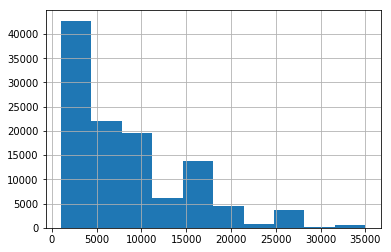

In [11]:
loan_df['LoanOriginalAmount'].hist();
print(loan_df['LoanOriginalAmount'].describe())

> Prosper average loan is between 1,000 and 35,000, with an average loan of 8,337. 
>Loan amount is right skew, the majority of their loans are under 12,000 dollars

count    84853.000000
mean         0.080306
std          0.046764
min          0.004900
25%          0.042400
50%          0.072400
75%          0.112000
max          0.366000
Name: EstimatedLoss, dtype: float64


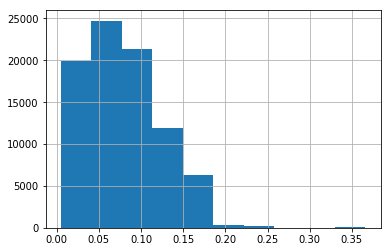

In [12]:
loan_df['EstimatedLoss'].hist();
print(loan_df['EstimatedLoss'].describe())

#I forgot how is estimated loss determined

loan_var.loc[loan_var['Variable']=='EstimatedLoss']

In [13]:
loan_df.groupby(loan_df['CreditGrade']).describe()

AmountDelinquent                                              \
                       count         mean           std  min  25%    50%   
CreditGrade                                                                
A                     2711.0   541.662486   3802.107140  0.0  0.0    0.0   
AA                    2834.0   252.216655   2991.382264  0.0  0.0    0.0   
B                     3600.0   553.716944   3519.884660  0.0  0.0    0.0   
C                     4531.0   924.768704   4374.733000  0.0  0.0    0.0   
D                     3927.0  1387.671505   6716.660594  0.0  0.0    0.0   
E                     1841.0  2264.081477   7142.469033  0.0  0.0    0.0   
HR                    1887.0  3153.552199  12466.204202  0.0  0.0  401.0   
NC                       0.0          NaN           NaN  NaN  NaN    NaN   

                              AvailableBankcardCredit                ...   \
                75%       max                   count          mean  ...    
CreditGrade                                                          ...    
A               0.0  105575.0                  2719.0  17086.944465  ...    
AA              0.0   81004.0                  2844.0  39930.196906  ...    
B               0.0   91162.0                  3612.0   8688.792636  ...    
C              60.0  112684.0                  4546.0   4118.735372  ...    
D             199.0  190585.0                  3944.0   2535.023327  ...    
E            1276.0  161344.0                  1846.0   1334.839112  ...    
HR           2949.5  444745.0                  1896.0    497.957806  ...    
NC              NaN       NaN                     2.0      0.000000  ...    

            TradesNeverDelinquentpercentage      TradesOpenedLast6Months  \
                                        75%  max                   count   
CreditGrade                                                                
A                                    1.0000  1.0                  2719.0   
AA                                   1.0000  1.0                  2844.0   
B                                    1.0000  1.0                  3612.0   
C                                    0.9500  1.0                  4546.0   
D                                    0.9400  1.0                  3944.0   
E                                    0.8600  1.0                  1846.0   
HR                                   0.7425  1.0                  1896.0   
NC                                   0.0000  0.0                     2.0   

                                                           
                 mean       std  min  25%  50%  75%   max  
CreditGrade                                                
A            1.016918  1.272512  0.0  0.0  1.0  2.0  14.0  
AA           0.887834  1.156002  0.0  0.0  1.0  1.0  10.0  
B            1.012458  1.348912  0.0  0.0  1.0  1.0  13.0  
C            1.106467  1.441524  0.0  0.0  1.0  2.0  12.0  
D            1.218813  1.495293  0.0  0.0  1.0  2.0  17.0  
E            1.268689  1.537733  0.0  0.0  1.0  2.0  15.0  
HR           1.178797  1.548919  0.0  0.0  1.0  2.0  13.0  
NC           0.000000  0.000000  0.0  0.0  0.0  0.0   0.0  

[8 rows x 488 columns]

>Too many columns to easy identify this relation. Will have to evaluate differently

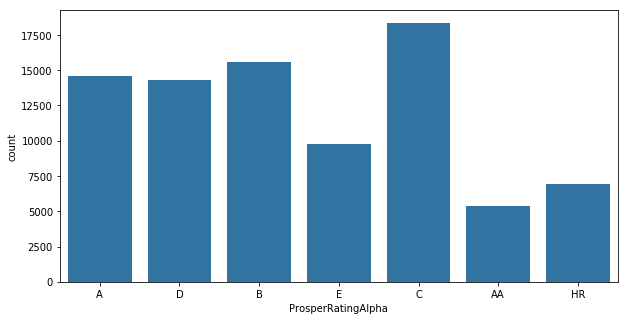

In [14]:
#exploring other interesting variables

dim = (10,5)
f, ax= plt.subplots(figsize=dim)

default_color = sns.color_palette()[0]
sns.countplot(data = loan_df, x = 'ProsperRatingAlpha', color = default_color , ax = ax );


AttributeError: 'NoneType' object has no attribute 'update'

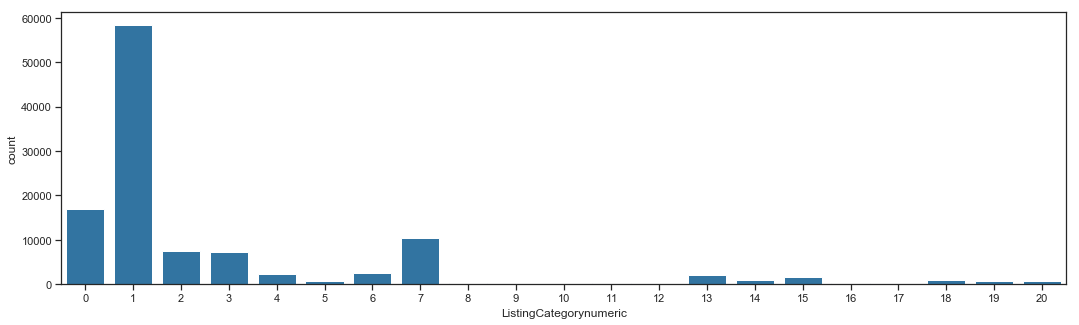

In [136]:
dim = (18,5)
f, ax= plt.subplots(figsize=dim)

sns.countplot(data = loan_df, x = 'ListingCategorynumeric', color = default_color, ax = ax)
plt.xticks(['N/A'])
#plt.xticks(['Not Available','Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan', 'Student Use',  'Auto', 'Other', 'Baby&Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring', 'Green Loans', 'Household Expenses',  'Large Purchases',  'Medical/Dental',  'Motorcycle',  'RV',  'Taxes',  'Vacation','Wedding Loans']);
plt.show()

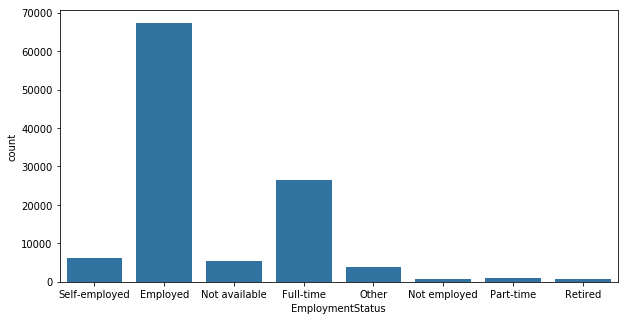

In [16]:
dim = (10,5)
f, ax= plt.subplots(figsize=dim)
sns.countplot(data = loan_df, x = 'EmploymentStatus', color = default_color);

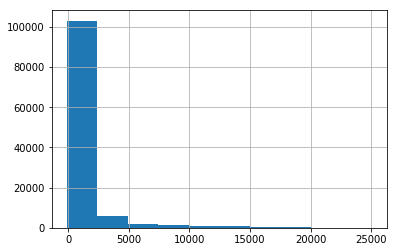

In [17]:
loan_df.LP_GrossPrincipalLoss.hist();

count    113346.000000
mean        685.567731
std          66.458275
min           0.000000
25%         660.000000
50%         680.000000
75%         720.000000
max         880.000000
Name: CreditScoreRangeLower, dtype: float64

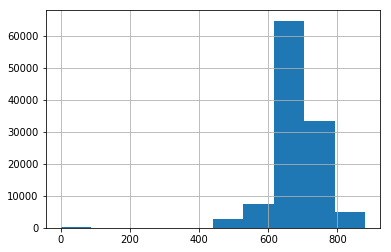

In [18]:
loan_df['CreditScoreRangeLower'].hist()
loan_df['CreditScoreRangeLower'].describe()

In [89]:
#variables of interest
var_int =['BorrowerAPR','EstimatedLoss','ProsperRatingnumeric', 'CreditScoreRangeLower', 'IncomeRange','StatedMonthlyIncome', 'TotalProsperLoans','ProsperPaymentsOneMonthPlusLate','LoanOriginalAmount','LP_ServiceFees','LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss'] 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The prosper rating score seems to be evenly distributed, although the higher the rating the less number of loans in the portfolio. THis is what I was expecting. Inclusing the distribution of the credit score
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I noticed that there is some suprising datapoints in relation to the employment variable, where theres a lot of loans for which employment status is not provided. Odd as it seems that it could be a great consideration for the approval of the loan. I also renamed the column names by replacing empty spaces and other characters.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [20]:
cor = loan_df.corr()

In [21]:
cor.ProsperRatingnumeric.sort_values()

EstimatedLoss                         -0.964182
BorrowerAPR                           -0.962151
LenderYield                           -0.953119
BorrowerRate                          -0.953105
EstimatedEffectiveYield               -0.848394
EstimatedReturn                       -0.659980
BankcardUtilization                   -0.265217
InquiriesLast6Months                  -0.264305
LP_ServiceFees                        -0.211337
TotalInquiries                        -0.188705
LoanCurrentDaysDelinquent             -0.174450
LoanMonthsSinceOrigination            -0.163213
TradesOpenedLast6Months               -0.152571
DelinquenciesLast7Years               -0.147149
CurrentDelinquencies                  -0.145205
DebtToIncomeRatio                     -0.135344
PublicRecordsLast10Years              -0.121103
LP_InterestandFees                    -0.104901
ListingCategorynumeric                -0.094474
LP_GrossPrincipalLoss                 -0.086118
LP_NetPrincipalLoss                   -0

The Prosper numeric rating has a high negative correlation with the following:
- EstimatedLoss                         -0.964182
- BorrowerAPR                           -0.962151
- LenderYield                           -0.953119
- BorrowerRate                          -0.953105
- EstimatedEffectiveYield               -0.848394
- EstimatedReturn                       -0.659980

And have a high positive correlation with:

- MonthlyLoanPayment                     0.329262
- AvailableBankcardCredit                0.374432
- LoanOriginalAmount                     0.428557
- CreditScoreRangeUpper                  0.548874
- CreditScoreRangeLower                  0.548874
- ProsperScore                           0.705221

In [22]:
loan_df.ProsperRatingnumericProsperRatingnumeric.describe()


count    84853.000000
mean         4.072243
std          1.673227
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: ProsperRatingnumeric, dtype: float64

In [ ]:
numeric_vars = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']
categoric_vars = ['cut', 'color', 'clarity']

# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(diamonds[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

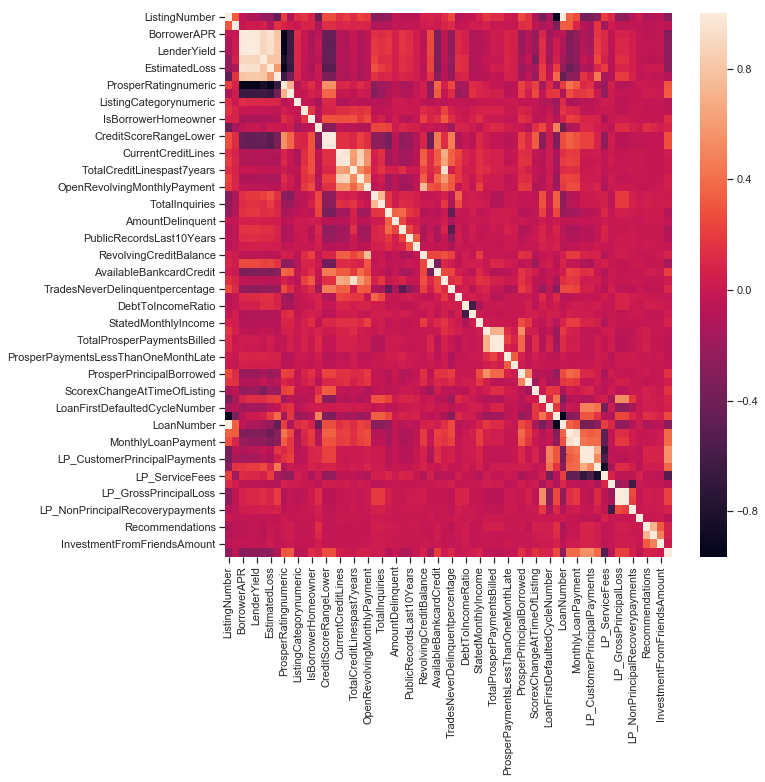

In [79]:
dim = (10,10)
f, ax= plt.subplots(figsize=dim)

sns.heatmap(data = cor, ax=ax)
plt.show()

In [93]:
loan_df.groupby('EmploymentStatus')['LoanOriginalAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
EmploymentStatus,,,,,,,,
Employed,67322.0,9794.017988,6474.516862,1000.0,4000.0,9000.0,15000.0,35000.0
Full-time,26355.0,6194.779017,5309.345231,1000.0,2500.0,4950.0,8000.0,35000.0
Not available,5347.0,5372.534879,5211.863100,1000.0,2137.5,3225.0,6300.0,25000.0
Not employed,835.0,4872.659880,3676.242480,1000.0,2500.0,4000.0,6000.0,25000.0
Other,3806.0,6861.727010,4854.981062,1000.0,4000.0,4000.0,10000.0,35000.0
Part-time,1088.0,4088.772059,3667.030115,1000.0,1600.0,3000.0,5000.0,25000.0
Retired,795.0,4784.145912,4015.779066,1000.0,2000.0,3500.0,6000.0,25000.0
Self-employed,6134.0,8122.836485,5355.250968,1000.0,4000.0,7000.0,11000.0,25000.0


>It seems that the maximum loan issued to not employed, part times, retired and self employed to be 25,000 dollars. Where Full time and other employment was 35,000. 10k more. And although the average loan size is the largest among employed individuals, self employed take second place, surprising since I expected Full-times to be higher.

In [96]:
loan_df.groupby('EmploymentStatus')['LP_GrossPrincipalLoss'].describe()

,count,mean,std,min,25%,50%,75%,max
EmploymentStatus,,,,,,,,
Employed,67322.0,350.554297,1725.234120,-94.2,0.0,0.0,0.000,25000.00
Full-time,26355.0,1293.146996,3169.592577,0.0,0.0,0.0,934.065,25000.00
Not available,5347.0,1565.924655,3172.048372,0.0,0.0,0.0,1967.725,24508.52
Not employed,835.0,1087.022683,2540.526269,0.0,0.0,0.0,399.895,22049.68
Other,3806.0,419.642827,1717.627222,0.0,0.0,0.0,0.000,21925.96
Part-time,1088.0,749.347813,1988.847972,0.0,0.0,0.0,0.000,19544.78
Retired,795.0,1091.421157,2470.655538,0.0,0.0,0.0,978.385,23164.93
Self-employed,6134.0,1157.121816,3356.590531,0.0,0.0,0.0,0.000,25000.00


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> One of the most telling relationship analysed was the Prosper Rating, it showed that the most important factors that affected the Prosper estimated losses, APR, Loan payments, amount loaned. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>It seems that the maximum loan issued to not employed, part times, retired and self employed to be 25,000 dollars. Where Full time and other employment was 35,000. 10k more. And although the average loan size is the largest among employed individuals, self employed take second place, surprising since I expected Full-times to be higher.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

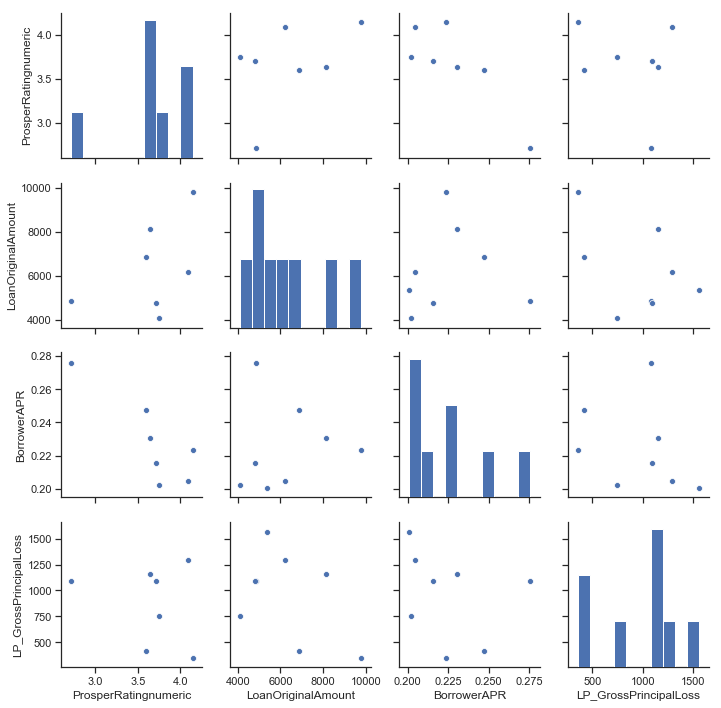

In [84]:
sns.set(style='ticks')
sns.pairplot(loan_df.groupby('EmploymentStatus')
             ['ProsperRatingnumeric','LoanOriginalAmount','BorrowerAPR','LP_GrossPrincipalLoss'].mean());

In [86]:
loan_df.groupby('EmploymentStatus')['ProsperRatingnumeric',
                                    'LoanOriginalAmount','BorrowerAPR','LP_GrossPrincipalLoss'].mean()

,ProsperRatingnumeric,LoanOriginalAmount,BorrowerAPR,LP_GrossPrincipalLoss
EmploymentStatus,,,,
Employed,4.142639,9794.017988,0.223558,350.554297
Full-time,4.087423,6194.779017,0.204604,1293.146996
Not available,NaN,5372.534879,0.200607,1565.924655
Not employed,2.713405,4872.659880,0.275757,1087.022683
Other,3.599842,6861.727010,0.247302,419.642827
Part-time,3.753906,4088.772059,0.202211,749.347813
Retired,3.708447,4784.145912,0.215450,1091.421157
Self-employed,3.639489,8122.836485,0.230295,1157.121816


In [87]:
loan_df.groupby('EmploymentStatus')['LoanOriginalAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
EmploymentStatus,,,,,,,,
Employed,67322.0,9794.017988,6474.516862,1000.0,4000.0,9000.0,15000.0,35000.0
Full-time,26355.0,6194.779017,5309.345231,1000.0,2500.0,4950.0,8000.0,35000.0
Not available,5347.0,5372.534879,5211.863100,1000.0,2137.5,3225.0,6300.0,25000.0
Not employed,835.0,4872.659880,3676.242480,1000.0,2500.0,4000.0,6000.0,25000.0
Other,3806.0,6861.727010,4854.981062,1000.0,4000.0,4000.0,10000.0,35000.0
Part-time,1088.0,4088.772059,3667.030115,1000.0,1600.0,3000.0,5000.0,25000.0
Retired,795.0,4784.145912,4015.779066,1000.0,2000.0,3500.0,6000.0,25000.0
Self-employed,6134.0,8122.836485,5355.250968,1000.0,4000.0,7000.0,11000.0,25000.0


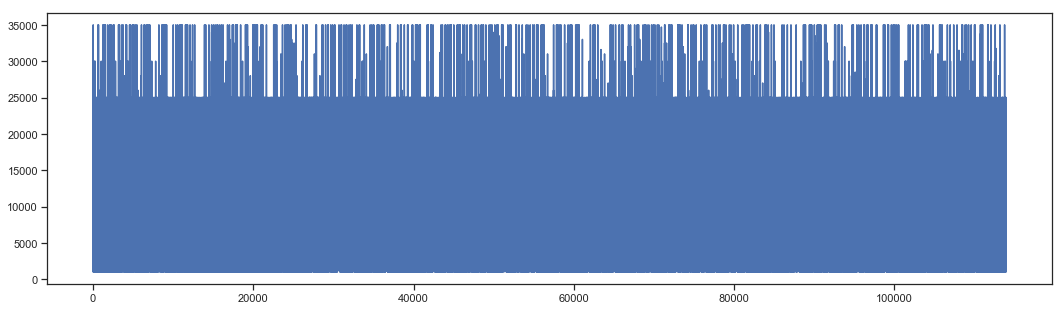

In [129]:
dim = (18,5)
f, ax= plt.subplots(figsize=dim)

sns.lineplot(data= loan_df['LoanOriginalAmount'], palette="tab10")

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!